In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('../data/sample_data.csv')
print("Veri boyutu:", df.shape)
print(df.info())
print(df.describe())

Veri boyutu: (50000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Invoice      50000 non-null  object 
 1   StockCode    50000 non-null  object 
 2   Description  49734 non-null  object 
 3   Quantity     50000 non-null  int64  
 4   InvoiceDate  50000 non-null  object 
 5   Price        50000 non-null  float64
 6   Customer ID  36103 non-null  float64
 7   Country      50000 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.1+ MB
None
           Quantity         Price   Customer ID
count  50000.000000  50000.000000  36103.000000
mean      10.286000      4.329999  15419.529402
std       61.711476     21.533923   1672.573649
min    -2127.000000      0.000000  12346.000000
25%        1.000000      1.250000  14080.000000
50%        3.000000      2.570000  15456.000000
75%        8.000000      4.950000  16887.0000

In [22]:
print(df.isnull().sum())


Invoice            0
StockCode          0
Description      266
Quantity           0
InvoiceDate        0
Price              0
Customer ID    13897
Country            0
dtype: int64


<Axes: >

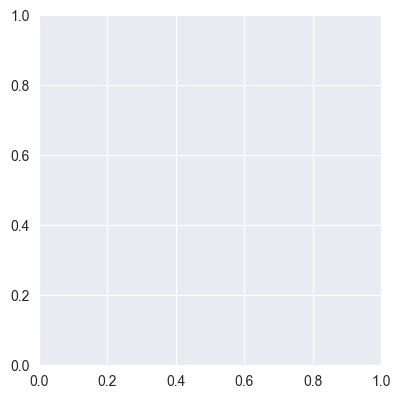

In [24]:
plt.figure(figsize=(15, 10))

Text(0.5, 1.0, 'En Çok Satış Yapılan Ülkeler')

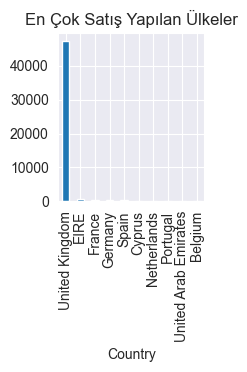

In [6]:
plt.subplot(2, 3, 1)
df['Country'].value_counts().head(10).plot(kind='bar')
plt.title('En Çok Satış Yapılan Ülkeler')

In [ ]:
# Günlük satış trendi
df['TotalAmount'] = df['Quantity'] * df['Price']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
# Günlük bazda grupla (sadece tarih kısmı, saat olmadan)
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['TotalAmount'].sum()

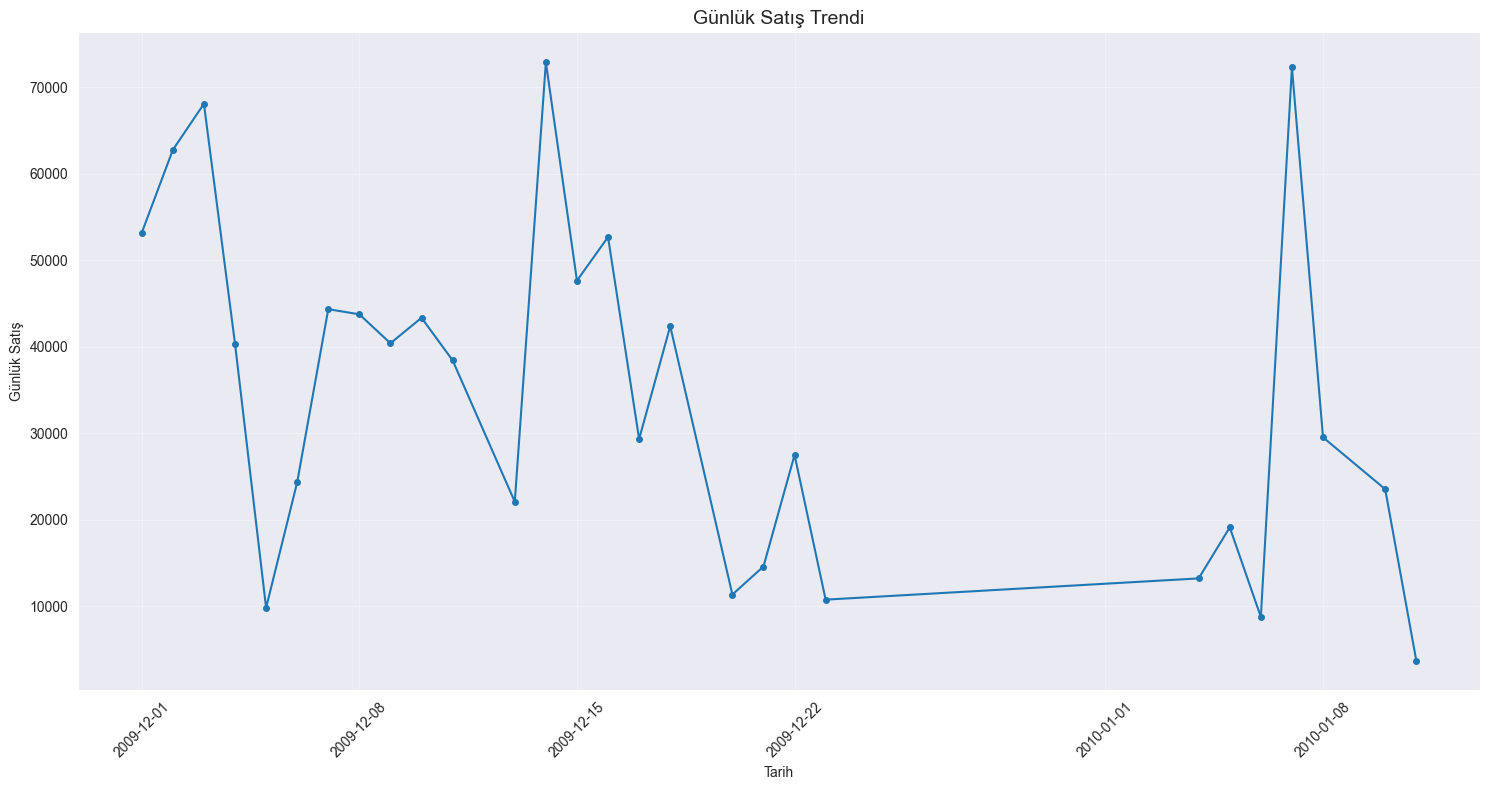

In [13]:
# Görselleştirme
plt.figure(figsize=(15, 8))
daily_sales.plot(kind='line', marker='o', markersize=4)
plt.title('Günlük Satış Trendi', fontsize=14)
plt.xlabel('Tarih')
plt.ylabel('Günlük Satış')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
print(daily_sales)

InvoiceDate
2009-12-01    53173.03
2009-12-02    62763.59
2009-12-03    68093.05
2009-12-04    40346.40
2009-12-05     9803.05
2009-12-06    24317.20
2009-12-07    44337.02
2009-12-08    43743.14
2009-12-09    40396.55
2009-12-10    43342.48
2009-12-11    38424.92
2009-12-13    22065.99
2009-12-14    72898.24
2009-12-15    47636.66
2009-12-16    52681.20
2009-12-17    29317.79
2009-12-18    42371.08
2009-12-20    11335.23
2009-12-21    14576.07
2009-12-22    27481.74
2009-12-23    10742.68
2010-01-04    13200.60
2010-01-05    19102.34
2010-01-06     8746.18
2010-01-07    72307.92
2010-01-08    29516.63
2010-01-10    23519.92
2010-01-11     3702.52
Name: TotalAmount, dtype: float64


In [19]:
# Daha detaylı günlük analiz
df['Date'] = df['InvoiceDate'].dt.date
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()


In [20]:

# Günlük istatistikler
daily_stats = df.groupby('Date').agg({
    'TotalAmount': ['sum', 'mean', 'count'],
    'Customer ID': 'nunique'
}).round(2)


In [ ]:
daily_stats.columns = ['Toplam_Satis', 'Ortalama_Satis', 'Islem_Sayisi', 'Musteri_Sayisi']
print(daily_stats)


In [32]:

# Haftanın günlerine göre analiz
weekday_sales = df.groupby('DayOfWeek')['TotalAmount'].sum()
print("\nHaftanın günlerine göre satış:")
print(weekday_sales)

KeyError: 'DayOfWeek'

<Axes: >

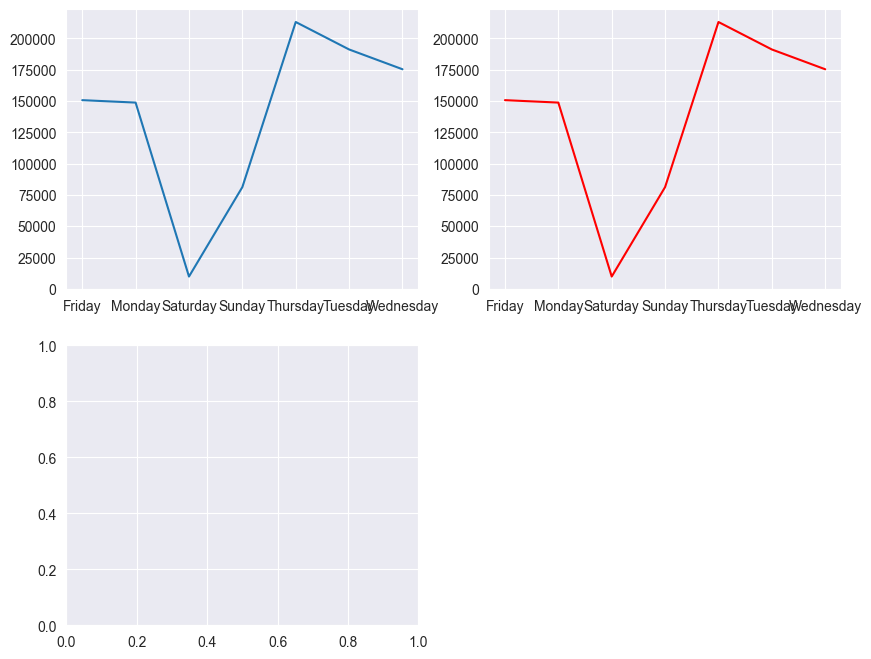

In [31]:
plt.figure(figsize=(10, 8))


<Axes: >

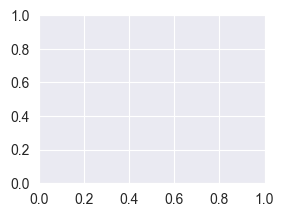

In [27]:
plt.plot